# Yale Hydropower Model

## Rocky River Powerplant

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime, calendar

In [51]:
# Load data
stream_flow_data_path = './data/StreamFlowData.csv'
stream_flow_df = pd.read_csv(stream_flow_data_path)
stream_flow_df = stream_flow_df.drop(['Unnamed: 0', 'agency_cd', 'site_no', 'X_00060_00003_cd'], axis=1)
stream_flow_df = stream_flow_df.rename(columns={"Date":"Date", "X_00060_00003":"CFS"})
stream_flow_df['Date'] = pd.to_datetime(stream_flow_df['Date'], format='%m/%d/%Y')
# filter out 1993-2021
df_stream = stream_flow_df[(stream_flow_df['Date'] >= '1993-01-01') & (stream_flow_df['Date'] < '2023-01-01')]

In [24]:
df_stream = df_stream.set_index('Date')
df_stream

,CFS
Date,
1993-01-01,6110.0
1993-01-02,5350.0
1993-01-03,4280.0
1993-01-04,3720.0
1993-01-05,4530.0
...,...
1997-12-27,1270.0
1997-12-28,1240.0
1997-12-29,1130.0


<AxesSubplot: >

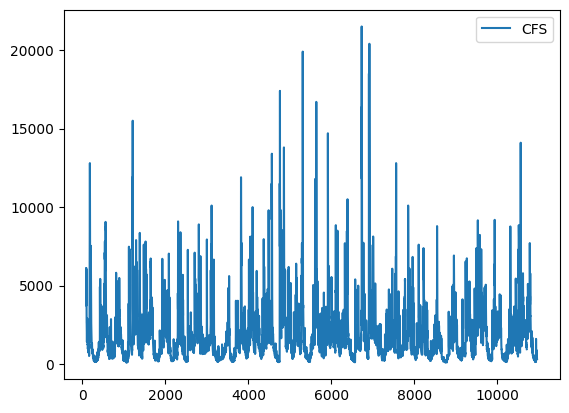

In [52]:
# year = 1996
# start_range = str(year) + "-01-01"
# end_range = str(year) + "-12-31"
# century = df_stream[start_range:end_range]
df_stream.plot(y='CFS', use_index=True)

In [26]:
# df_stream['SMA5'] = df_stream['CFS'].rolling(30).mean()
# df_stream.dropna(inplace=True)
# df_stream[['CFS', 'SMA5']].plot(label='df_stream', figsize=(16, 8))
# plt.axhline(y=np.nanmean(df_stream['SMA5']))


In [27]:
# Gets the dates for a given month in a given year
def get_dates(year, month):
    weeks = calendar.monthcalendar(year, month)
    dates = []
    for w in weeks:
        for d in w:
            if d != 0 and d not in dates:
                dates.append(d)
    return dates

In [28]:
# Gets formatted dates for every day in the year 2035 and stores in date_strings
# Associated data for all years stored in date_CFS
date_strings = []
date_CFS = []
for i in range(12):
    md = get_dates(2035, i + 1)
    date_string = '2035-' + str(i + 1).zfill(2) + '-'
    for d in md:
        temp_date_string = date_string + str(d).zfill(2)
        date_strings.append(temp_date_string)
        date_CFS.append(np.asarray(df_stream.loc[(df_stream.index.month==i+1) & (df_stream.index.day==d)]).flatten())

print(date_strings)

['2035-01-01', '2035-01-02', '2035-01-03', '2035-01-04', '2035-01-05', '2035-01-06', '2035-01-07', '2035-01-08', '2035-01-09', '2035-01-10', '2035-01-11', '2035-01-12', '2035-01-13', '2035-01-14', '2035-01-15', '2035-01-16', '2035-01-17', '2035-01-18', '2035-01-19', '2035-01-20', '2035-01-21', '2035-01-22', '2035-01-23', '2035-01-24', '2035-01-25', '2035-01-26', '2035-01-27', '2035-01-28', '2035-01-29', '2035-01-30', '2035-01-31', '2035-02-01', '2035-02-02', '2035-02-03', '2035-02-04', '2035-02-05', '2035-02-06', '2035-02-07', '2035-02-08', '2035-02-09', '2035-02-10', '2035-02-11', '2035-02-12', '2035-02-13', '2035-02-14', '2035-02-15', '2035-02-16', '2035-02-17', '2035-02-18', '2035-02-19', '2035-02-20', '2035-02-21', '2035-02-22', '2035-02-23', '2035-02-24', '2035-02-25', '2035-02-26', '2035-02-27', '2035-02-28', '2035-03-01', '2035-03-02', '2035-03-03', '2035-03-04', '2035-03-05', '2035-03-06', '2035-03-07', '2035-03-08', '2035-03-09', '2035-03-10', '2035-03-11', '2035-03-12', '2035

In [29]:
# Fromats data for every day in a year with date, median flow rate, max flow rate and minimum flow rate
# max flow rate = min(med + std, maximum)
# min flow rate = max(med - std, minimum)
year_data = []
for i in range(len(date_strings)):
    current_date_data = [date_strings[i]]
    a = date_CFS[i]
    current_date_data.append(np.median(a))
    current_date_data.append(min(np.median(a) + np.std(a), np.max(a)))
    current_date_data.append(max(np.median(a) - np.std(a), np.min(a)))
    year_data.append(current_date_data)

year_data = np.array(year_data)

In [30]:
# Builds dataframe and adds date as datetime
df = pd.DataFrame(year_data, columns = ['date', 'median', 'min', 'max'])
df['date'] = pd.to_datetime(df['date'])

In [46]:
# df_stream['SMA5'] = df_stream['CFS'].rolling(30).mean()
# df_stream.dropna(inplace=True)
# df_stream[['CFS', 'SMA5']].plot(label='df_stream', figsize=(16, 8))
# plt.axhline(y=np.nanmean(df_stream['SMA5']))
# sns.lineplot(x='date', y='min', data=df)
mi = list(df['min'])
ma = list(df['max'])
me = list(df['median'])

# df.plot(y='min', use_index=True)
# print(df.index)
# print(me)
# x = np.arange(1, len(me) + 1, 1)
# plt.plot(x, mi)
# plt.plot(x, me)
# plt.plot(x, ma)